<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject09_Before_and_After_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 2020년 or 20201년 전후 코로나로 인해 국가별로 증가/감소한 요소가 존재하는가?
# -> 이 증가/감소한 요소가 행복지수에 반영이 되었는가?
# 특히 동아시아 국가에서

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [71]:
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [72]:
df2020

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2.5669,2.505530,0.470367,0.525900,0.396573,-0.096429
1,Albania,Central and Eastern Europe,4.8827,4.772713,0.671070,0.687081,0.781994,-0.042309
2,Algeria,Middle East and North Africa,5.0051,4.918397,0.803385,0.659052,0.466611,-0.121105
3,Argentina,Latin America and Caribbean,5.9747,5.869954,0.900568,0.688038,0.831132,-0.194914
4,Armenia,Commonwealth of Independent States,4.6768,4.561953,0.757479,0.667507,0.712018,-0.138780
...,...,...,...,...,...,...,...,...
142,Venezuela,Latin America and Caribbean,5.0532,4.927210,0.890408,0.665053,0.623278,-0.169091
143,Vietnam,Southeast Asia,5.3535,5.287251,0.849987,0.679527,0.939593,-0.094533
144,Yemen,Middle East and North Africa,3.5274,3.421250,0.817981,0.567273,0.599920,-0.157735
145,Zambia,Sub-Saharan Africa,3.7594,3.640474,0.698824,0.552994,0.806500,0.078037


In [73]:
col_list=['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

mean2017=df2017[col_list].mean()
mean2018=df2018[col_list].mean()
mean2019=df2019[col_list].mean()
mean2020=df2020[col_list].mean()
mean2021=df2021[col_list].mean()

# happy20_top10 = df2020.groupby('Country')['Score'].max().sort_values(ascending=False).head(10).reset_index()
# df2020.columns_top10 = ['Country','Score']

In [74]:
df2021

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2.523,0.370,0.126,0.382,-0.102,0.924
1,Albania,Central and Eastern Europe,5.117,1.008,0.646,0.785,-0.030,0.901
2,Algeria,Middle East and North Africa,4.887,0.946,0.552,0.480,-0.067,0.752
3,Argentina,Latin America and Caribbean,5.929,1.162,0.646,0.828,-0.182,0.834
4,Armenia,Commonwealth of Independent States,5.283,0.996,0.585,0.825,-0.168,0.629
...,...,...,...,...,...,...,...,...
142,Venezuela,Latin America and Caribbean,4.892,0.852,0.574,0.615,-0.169,0.827
143,Vietnam,Southeast Asia,5.411,0.817,0.616,0.940,-0.098,0.796
144,Yemen,Middle East and North Africa,3.658,0.329,0.272,0.602,-0.147,0.800
145,Zambia,Sub-Saharan Africa,4.073,0.528,0.231,0.782,0.061,0.823


In [75]:
mean2020

Score                           5.511924
GDP per capita                  5.410239
Healthy life expectancy         0.813198
Freedom to make life choices    0.646902
Generosity                      0.786465
Perceptions of corruption      -0.016532
dtype: float64

In [76]:
df_mean=pd.DataFrame(data=[mean2017, mean2018, mean2019, mean2020, mean2021], index=[2017,2018,2019,2020,2021])
df_mean

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2017,5.383871,0.999573,0.561900,0.409222,0.243393,0.121671
2018,5.415694,0.907510,0.611143,0.457959,0.178653,0.112240
2019,5.456469,0.921408,0.739095,0.396728,0.181313,0.110748
2020,5.511924,5.410239,0.813198,0.646902,0.786465,-0.016532
2021,5.538054,0.975605,0.518857,0.791449,-0.015762,0.725578


In [77]:
mean1719=df_mean[col_list].iloc[:3].mean()
mean1719

Score                           5.418678
GDP per capita                  0.942830
Healthy life expectancy         0.637379
Freedom to make life choices    0.421303
Generosity                      0.201120
Perceptions of corruption       0.114886
dtype: float64

In [78]:
mean20_21=df_mean[col_list].iloc[4:].mean()
mean20_21

Score                           5.538054
GDP per capita                  0.975605
Healthy life expectancy         0.518857
Freedom to make life choices    0.791449
Generosity                     -0.015762
Perceptions of corruption       0.725578
dtype: float64

In [79]:
mean_diff=pd.DataFrame(data=mean2021-mean1719)
mean_diff

,0
Score,0.119376
GDP per capita,0.032775
Healthy life expectancy,-0.118522
Freedom to make life choices,0.370146
Generosity,-0.216881
Perceptions of corruption,0.610692


In [80]:
mean2021.tolist()

[5.538054421768709,
 0.9756054421768708,
 0.5188571428571429,
 0.7914489795918368,
 -0.015761904761904758,
 0.7255782312925168]

In [81]:
col_list

['Score',
 'GDP per capita',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

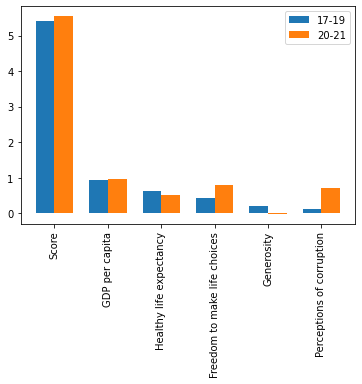

In [82]:
fig, ax=plt.subplots()

width = 0.35
index=np.arange(len(col_list))

p1=ax.bar(index-width/2, mean1719.tolist(), width, label='17-19')
p2=ax.bar(index+width/2, mean2021.tolist(), width, label='20-21')
ax.set_xticks(index)
ax.set_xticklabels(col_list)
plt.xticks(rotation='vertical')

ax.legend()

# 2017~2019 평균 data 값 분포와 2020~2021 평균 data 값의 분포

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

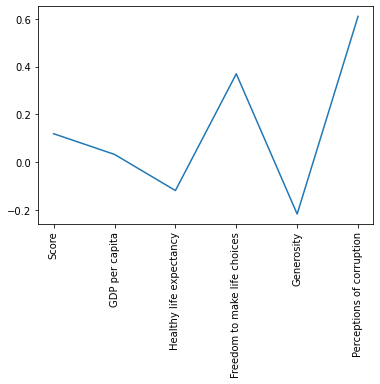

In [83]:
fig = plt.figure(figsize=(6,4))

plt.plot(mean_diff)
plt.xticks(rotation='vertical')

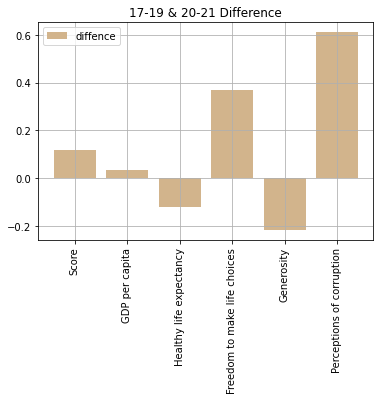

In [84]:
fig, ax=plt.subplots()

mean_diff=mean2021-mean1719
# 2021-1719 이므로 양수:2021이 더 큰 값, 음수:2021이 더 작은 값
ax.bar(index, mean_diff.tolist(), label='diffence', facecolor='tan')
ax.set_title('17-19 & 20-21 Difference')
ax.set_xticks(index)
ax.set_xticklabels(col_list)

plt.xticks(rotation='vertical')
plt.grid()
plt.legend()
plt.show()

# Happiness Score가 오히려 2021 시기에 증가
# -> 코로나와 같은 세계적 재해가 행복 지수에 영향을 주지 않았음을 확인 가능

In [85]:
# East_Asia
East_Asia2017=df2017[df2017['Regional indicator']=='East Asia']
East_Asia2017

East_Asia2018=df2018[df2018['Regional indicator']=='East Asia']
East_Asia2018

East_Asia2019=df2017[df2019['Regional indicator']=='East Asia']
East_Asia2019

East_Asia2020=df2020[df2020['Regional indicator']=='East Asia']
East_Asia2020

East_Asia2021=df2021[df2021['Regional indicator']=='East Asia']
East_Asia2021

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,China,East Asia,5.339,1.061,0.665,0.904,-0.146,0.755
52,Hong Kong S.A.R. of China,East Asia,5.477,1.525,0.893,0.717,0.067,0.403
64,Japan,East Asia,5.940,1.389,0.838,0.796,-0.258,0.638
88,Mongolia,East Asia,5.677,0.966,0.442,0.708,0.116,0.856
121,South Korea,East Asia,5.845,1.403,0.801,0.672,-0.083,0.727
127,Taiwan,East Asia,6.584,1.480,0.665,0.784,-0.070,0.721


In [86]:
East_Asia2017

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,Chad,East Asia,3.936,0.438013,0.041135,0.162342,0.216114,0.053582
52,"Hong Kong S.A.R., China",East Asia,5.472,1.551675,0.943062,0.490969,0.374466,0.293934
64,Japan,East Asia,5.920,1.416915,0.913476,0.505626,0.120573,0.163761
88,Montenegro,East Asia,5.237,1.121129,0.667465,0.194989,0.197911,0.088174
121,Spain,East Asia,6.403,1.384398,0.888961,0.408781,0.190134,0.070914
127,Taiwan,East Asia,6.422,1.433627,0.793984,0.361467,0.258360,0.063829


In [89]:
East_Asia2018

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,Chad,East Asia,4.301,0.358,0.053,0.189,0.181,0.060
52,Hong Kong,East Asia,5.430,1.405,1.030,0.524,0.246,0.291
64,Japan,East Asia,5.915,1.294,0.988,0.553,0.079,0.150
88,Mongolia,East Asia,5.125,0.914,0.575,0.395,0.253,0.032
121,South Korea,East Asia,5.875,1.266,0.955,0.244,0.175,0.051
127,Taiwan,East Asia,6.441,1.365,0.857,0.418,0.151,0.078


In [68]:
East_Asia2019

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,Chad,East Asia,3.936,0.438013,0.041135,0.162342,0.216114,0.053582
52,"Hong Kong S.A.R., China",East Asia,5.472,1.551675,0.943062,0.490969,0.374466,0.293934
64,Japan,East Asia,5.920,1.416915,0.913476,0.505626,0.120573,0.163761
88,Montenegro,East Asia,5.237,1.121129,0.667465,0.194989,0.197911,0.088174
121,Spain,East Asia,6.403,1.384398,0.888961,0.408781,0.190134,0.070914
127,Taiwan,East Asia,6.422,1.433627,0.793984,0.361467,0.258360,0.063829


In [69]:
East_Asia2020

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,China,East Asia,5.1239,5.073133,0.798761,0.692892,0.898518,-0.181426
52,Hong Kong S.A.R. of China,East Asia,5.5104,5.420203,0.845969,0.767717,0.779834,0.134980
64,Japan,East Asia,5.8708,5.789672,0.883546,0.750010,0.809961,-0.246910
88,Mongolia,East Asia,5.4562,5.377186,0.937142,0.623045,0.693351,0.098094
121,South Korea,East Asia,5.8724,5.785993,0.799387,0.736027,0.612965,-0.043404
127,Taiwan,East Asia,6.4554,6.378686,0.894309,0.696000,0.771530,-0.073199


In [56]:
num_East_Asia=len(East_Asia2017)
num_East_Asia

6

In [65]:
East_Asia1719=pd.DataFrame(data=[East_Asia2017, East_Asia2018, East_Asia2019])
# pd.DataFrame(data=[mean2017, mean2018, mean2019, mean2020, mean2021], index=[2017,2018,2019,2020,2021])
# 동아시아 국가들 내에서 국가명 다른 거 통일시키기

ValueError: ignored